In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/Аналитик_обучение/diamonds_задание_6.csv')

In [32]:
print(data.head())  # первые 5 строк
print(data.shape)
print()
print()
print(data.isnull().sum())  # Проверка пропусков

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
(53940, 10)


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [73]:
# Выбор только числовых столбцов
numeric_data = data.select_dtypes(include=[np.number])

# Проверка на наличие отрицательных чисел
negative_values = (numeric_data < 0).any()

print("Наличие отрицательных чисел в столбцах:")
print(negative_values)

Наличие отрицательных чисел в столбцах:
carat    False
depth    False
table    False
price    False
x        False
y        False
z        False
dtype: bool


In [34]:

# Проверка уникальных значений для категориальных признаков
print(data['cut'].value_counts())
print(data['color'].value_counts())
print(data['clarity'].value_counts())

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64


In [69]:
# Корреляция с price
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)
print(correlation_with_price)

price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64


In [108]:
# Создание сводной таблицы
pivot_table = data.pivot_table(values='price', index='cut', columns=['color', 'clarity'], aggfunc='mean')

# Вывод сводной таблицы
print(pivot_table)



color              0                                                       \
clarity            0             1            2            3            4   
cut                                                                         
0        7383.000000   1619.666667  4273.344828  4355.142857  2921.200000   
1        3490.750000  10030.333333  3021.172996  3595.295964  3556.581395   
2        3526.923077   6567.178571  2490.459350  3142.047753  2576.039886   
3        3818.750000   9056.500000  3236.377698  4351.085511  4178.045802   
4        2622.800000  10298.260870  3234.931174  4425.458599  2955.480000   

color                                                     1               ...  \
clarity            5            6            7            0            1  ...   
cut                                                                       ...   
0        4512.880000  4473.000000  3607.000000  2095.222222          NaN  ...   
1        3588.461538  2586.230769  2345.640000  4398.130435

In [63]:
import plotly.express as px

# Создание 3D-графика зависимости цены от xyz
fig = px.scatter_3d(data,
                    x='x',
                    y='y',
                    z='z',
                    color='price',
                    size='price',
                    title='Зависимость цены от размеров (x, y, z)',
                    labels={'x': 'Длина (x)', 'y': 'Ширина (y)', 'z': 'Высота (z)', 'price': 'Цена'},
                    opacity=0.7)

# Настройка осей
fig.update_layout(scene=dict(
    xaxis_title='Длина (x)',
    yaxis_title='Ширина (y)',
    zaxis_title='Высота (z)'
))

# Показать график
fig.show()

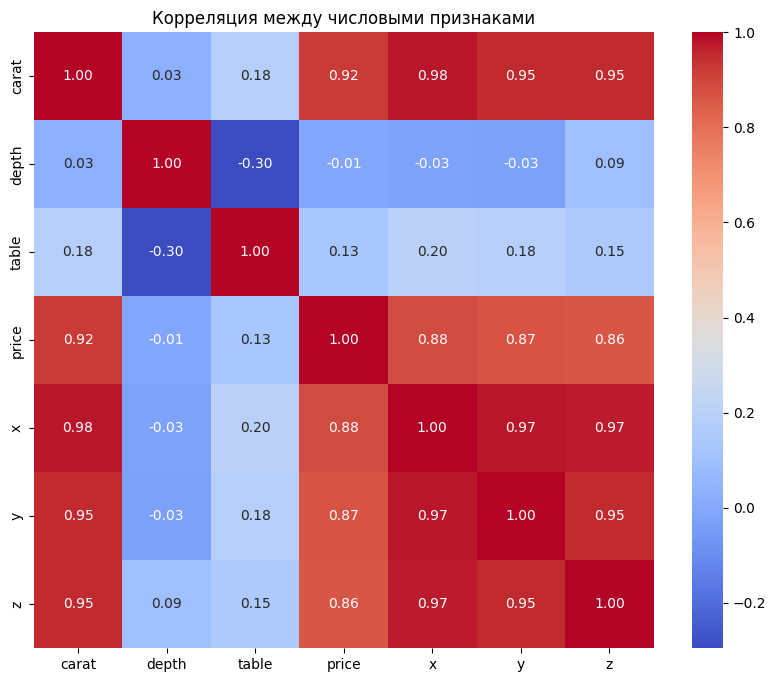

In [42]:

# Выбор только числовых признаков
numeric_data = data.select_dtypes(include=[np.number])

# Визуализация корреляции между числовыми признаками
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция между числовыми признаками')
plt.show()


### Закономерности и выводы

1. **Наиболее сильная корреляция с `price`:**
   - Признак `carat` имеет наибольшую положительную корреляцию с `price` (около 0.92). Это означает, что с увеличением веса бриллианта цена также увеличивается.
   - Признаки `x`, `y`, `z` (размеры бриллианта) также имеют высокую корреляцию с `price`.

2. **Слабая или отрицательная корреляция:**
   - Признаки `depth` и `table` имеют слабую корреляцию с `price`, что указывает на их меньшую значимость для предсказания цены.

3. **Категориальные признаки:**
   - Признак `cut` (качество огранки) показывает, что бриллианты с огранкой "Premium" имеют более высокую цену.
   - Признак `color` (цвет) показывает, что бриллианты с цветом "I" и "J" имеют более высокую цену.
   - Признак `clarity` (чистота) показывает, что бриллианты с чистотой "SI2" имеют более высокую цену.

Популярные категории:

cut: Ideal — самая популярная огранка.
color: G — самый популярный цвет.
clarity: SI1 — самая популярная чистота.

Редкие категории:

cut: Fair — самая редкая огранка.
color: J — самый редкий цвет.
clarity: I1 — самая редкая чистота.

  4. **Влияние cut, clarity и color:**

Бриллианты с более высоким качеством огранки (Ideal, Premium) имеют более высокую среднюю цену.

Бриллианты с цветом D и E (бесцветные) имеют более высокую среднюю цену, чем с цветом J.

Бриллианты с чистотой IF и VVS1 имеют более высокую среднюю цену, чем с чистотой SI2.

Самые дорогие бриллианты — это комбинации с cut=Ideal, color=D, clarity=IF.

4. **Взаимосвязи между признаками:**
   - Признаки `carat`, `x`, `y`, `z` сильно коррелируют друг с другом, что логично, так как они связаны с размерами бриллианта.
   - Признаки `depth` и `table` имеют слабую корреляцию с другими признаками.
